<a href="https://colab.research.google.com/github/yousefhassan1999/two-layer-XOR-problem/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

ReLU Activation Function

In [ ]:
def ReLU(value):
  return max(0,value)

Step 1: To initialize the weights and biases with random values

In [ ]:
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1 
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))


The forward pass involves compute the predicted output


In [ ]:
def Forwarding_Function (x , Hidden_Layer_activations):
  ReLU_output=0;
  for N in range(2):
    W2J=output_weights[N]
    Inside_ReLU=0
    b2J=hidden_bias[0][N]
    activation_N_Result=0
    for I in range(2):
      activation_N_Result += hidden_weights[N][I] * x[I]
    Inside_ReLU = ReLU(b2J +activation_N_Result)
    Hidden_Layer_activations[N]=Inside_ReLU
    ReLU_output += W2J*Inside_ReLU + output_bias
  return ReLU(ReLU_output)

Loss Functions:

In [ ]:
def Compute_loss_function():
  Result=0
  for d in range(D):
    det_W1_Squar = np.square(np.linalg.det(hidden_weights))
    det_W2_Squar = np.square(np.dot(output_weights.T,output_weights))
    det_b2_Squar = np.square(np.dot(hidden_bias,hidden_bias.T))
    det_b3_Squar = np.square(output_bias)
    Result += np.square(predicted_output_required[d]-expected_output[d]) + lr_required * (det_W1_Squar + det_W2_Squar + det_b2_Squar + det_b3_Squar)
  return Result/D


the derivative of the 
Relu(t) function

In [ ]:
def derivative_Forwarding_Function(d):
  dE_dw2 = (2 * lr_required * output_weights) + (( (2 * (predicted_output_required[d]-expected_output[d])) * hidden_Layer_activations) if predicted_output_required[d]>0 else 0)
  dE_db3 = (2 * lr_required * output_bias) + (( 2 * (predicted_output_required[d]-expected_output[d]) ) if predicted_output_required[d]>0 else 0)
  dE_dw1 = (2 * lr_required * hidden_weights) + (( 2 * (predicted_output_required[d]-expected_output[d]) * output_weights * inputs[d] ) if predicted_output_required[d]>0 else 0)
  dE_db2 = (2 * lr_required * hidden_bias) + (( 2 * (predicted_output_required[d]-expected_output[d]) * output_weights).T if predicted_output_required[d]>0 else 0)
  return dE_dw2 , dE_db3 , dE_dw1 , dE_db2

Gradient Descent:

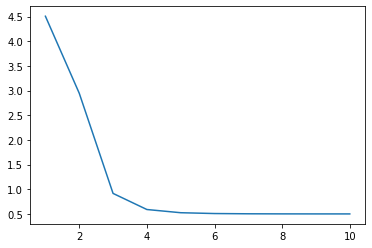

In [ ]:
epochs = 10
losses = []
D=4
lr_required = 0.5
η=0.1

for epoch in range(epochs):
  predicted_output_required = np.empty((4, 1))
  hidden_Layer_activations = np.empty((2, 1)) 
  for d in range(D):
    predicted_output_required[d]=Forwarding_Function(inputs[d] , hidden_Layer_activations)
  dE_dw1_list = []
  dE_dw2_list = []
  dE_db2_list = []
  dE_db3_list = []
  epoch_loss = np.average(Compute_loss_function())
  for d in range(D):
    dE_dw2 , dE_db3 , dE_dw1 , dE_db2 = derivative_Forwarding_Function(d)
    dE_dw1_list.append(np.array(dE_dw1))
    dE_dw2_list.append(np.array(dE_dw2))
    dE_db2_list.append(np.array(dE_db2))
    dE_db3_list.append(np.array(dE_db3))
  #Updating Weights and Biases
  output_weights -= (η * sum(dE_dw2_list)) 
  output_bias -= (η * sum(dE_db3_list))
  hidden_weights -= (η * sum(dE_dw1_list))
  hidden_bias -= (η * sum(dE_db2_list))
  
  losses.append(epoch_loss)

plt.plot(np.arange(1, epochs + 1), np.array(losses))